In [1]:
# Muntaqim Elahi
# G01035202
import os
os.getcwd()

'C:\\Users\\MetroMoomin'

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily 
import folium
import fsspec

### Part 1

In [3]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("https://github.com/babdelfa/project/blob/main/covid19_project.csv?raw=true")
df.head()

,FIPS,county,state,lat,long_,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/1/2020,7/2/2020,7/3/2020,7/4/2020,7/5/2020,7/6/2020,7/7/2020,7/8/2020,7/9/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/21/2020,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020,8/29/2020,8/30/2020,8/31/2020,9/1/2020,9/2/2020,9/3/2020,9/4/2020,9/5/2020,9/6/2020,9/7/2020,9/8/2020,9/9/2020,9/10/2020,9/11/2020,9/12/2020,9/13/2020,9/14/2020,9/15/2020,9/16/2020,9/17/2020,9/18/2020,9/19/2020,9/20/2020,9/21/2020,9/22/2020,9/23/2020,9/24/2020,9/25/2020,9/26/2020,9/27/2020,9/28/2020,9/29/2020,9/30/2020,10/1/2020,10/2/2020,10/3/2020,10/4/2020,10/5/2020,10/6/2020,10/7/2020,10/8/2020,10/9/2020,10/10/2020,10/11/2020,10/12/2020,10/13/2020,10/14/2020,10/15/2020,10/16/2020,10/17/2020,10/18/2020,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,10/31/2020,11/1/2020,11/2/2020,11/3/2020,11/4/2020,11/5/2020,11/6/2020,11/7/2020,11/8/2020,11/9/2020,11/10/2020,11/11/2020,11/12/2020,11/13/2020,11/14/2020,11/15/2020,11/16/2020,11/17/2020,11/18/2020,11/19/2020,11/20/2020,11/21/2020,11/22/2020,11/23/2020,11/24/2020,11/25/2020,11/26/2020,11/27/2020,11/28/2020,11/29/2020,11/30/2020,12/1/2020,12/2/2020,12/3/2020,12/4/2020,12/5/2020,12/6/2020,12/7/2020,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020,12/18/2020,12/19/2020,12/20/2020,12/21/2020,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020,1/1/2021,1/2/2021,1/3/2021,1/4/2021,1/5/2021,1/6/2021,1/7/2021,1/8/2021,1/9/2021,1/10/2021,1/11/2021,1/12/2021,1/13/2021,1/14/2021,1/15/2021,1/16/2021,1/17/2021,1/18/2021,1/19/2021,1/20/2021,1/21/2021,1/22/2021,1/23/2021,1/24/2021,1/25/2021,1/26/2021,1/27/2021,1/28/2021,1/29/2021,1/30/2021,1/31/2021,2/1/2021,2/2/2021,2/3/2021,2/4/2021,2/5/2021,2/6/2021,2/7/2021,2/8/2021,2/9/2021,2/10/2021,2/11/2021,2/12/2021,2/13/2021,2/14/2021,2/15/2021,2/16/2021,2/17/2021,2/18/2021,2/19/2021,2/20/2021,2/21/2021,2/22/2021,2/23/2021,2/24/2

In [4]:
df = df.melt(id_vars = ["FIPS",
                       "county",
                        "state",
                       "lat",
                       "long_"
                       ],
            var_name = "Dates",
            value_name = "Cases")
df.Dates = pd.to_datetime(df.Dates)
df.tail()


,FIPS,county,state,lat,long_,Dates,Cases
2222425,56039.0,Teton,Wyoming,43.935225,-110.589080,2021-11-16,5323
2222426,56041.0,Uinta,Wyoming,41.287818,-110.547578,2021-11-16,3975
2222427,90056.0,Unassigned,Wyoming,0.000000,0.000000,2021-11-16,0
2222428,56043.0,Washakie,Wyoming,43.904516,-107.680187,2021-11-16,1820
2222429,56045.0,Weston,Wyoming,43.839612,-104.567488,2021-11-16,1183


In [5]:
df.head()

,FIPS,county,state,lat,long_,Dates,Cases
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0
1,1003.0,Baldwin,Alabama,30.727750,-87.722071,2020-01-22,0
2,1005.0,Barbour,Alabama,31.868263,-85.387129,2020-01-22,0
3,1007.0,Bibb,Alabama,32.996421,-87.125115,2020-01-22,0
4,1009.0,Blount,Alabama,33.982109,-86.567906,2020-01-22,0


### Total Cases in USA

In [6]:
# 1
total_USA_cases = df[(df.Dates == "2021-11-16")]
print(total_USA_cases.Cases.sum())

47309008


### Total Cases in Virginia

In [7]:
# 2
df_filter = df["state"] == "Virginia"
df2 = df[df_filter]
total_VA_cases = df2[(df2.Dates == "2021-11-16")]
print(total_VA_cases.Cases.sum())

947271


In [8]:
df2.tail()

,FIPS,county,state,lat,long_,Dates,Cases
2222228,51830.0,Williamsburg,Virginia,37.281313,-76.709051,2021-11-16,1184
2222229,51840.0,Winchester,Virginia,39.170545,-78.173251,2021-11-16,3764
2222230,51195.0,Wise,Virginia,36.974615,-82.624105,2021-11-16,5650
2222231,51197.0,Wythe,Virginia,36.915820,-81.078341,2021-11-16,4659
2222232,51199.0,York,Virginia,37.243748,-76.544128,2021-11-16,5600


### Barcode for New Cases in Virginia for last 10 days in the data. Weekends no data was reported.

<ipython-input-9-f27f531541e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VA["New_Cases"] = df_VA.groupby(["county"])["Cases"].diff()


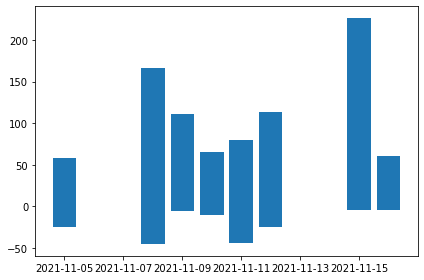

In [9]:
# 3 
df_VA = df[df.state.isin(["Virginia"])]
df_VA["New_Cases"] = df_VA.groupby(["county"])["Cases"].diff()
df_VA10 = df_VA[df_VA.Dates >= "2021-11-05"]
plt.bar(df_VA10.Dates, df_VA10.New_Cases)
plt.tight_layout()
# Zero new cases reported during the weekends.

### Top 3 counties with the most covid-19 cases displayed in the table below

In [10]:
# 4
df_VA_counties = df_VA.groupby(["county"]).max()
VA_mostcases = df_VA_counties.sort_values(['Cases'], ascending=[False])
VA_mostcases.head(3)

,FIPS,state,lat,long_,Dates,Cases,New_Cases
county,,,,,,,
Fairfax,51059.0,Virginia,38.836776,-77.275658,2021-11-16,93142,1485.0
Prince William,51153.0,Virginia,38.709162,-77.487137,2021-11-16,56165,1356.0
Virginia Beach,51810.0,Virginia,36.732857,-76.045669,2021-11-16,50628,544.0


### Highest New Cases reported for the top 3 counties and the date is listed on the three tables below.

In [11]:
# 5
df_FF = df_VA[df_VA.county.isin(['Fairfax'])]
df_PW = df_VA[df_VA.county.isin(["Prince William"])]
df_VB = df_VA[df_VA.county.isin(['Virginia Beach'])]

df_FF.groupby("New_Cases").max().tail(1)

,FIPS,county,state,lat,long_,Dates,Cases
New_Cases,,,,,,,
1485.0,51059.0,Fairfax,Virginia,38.836776,-77.275658,2021-01-17,53976


In [12]:
df_PW.groupby("New_Cases").max().tail(1)

,FIPS,county,state,lat,long_,Dates,Cases
New_Cases,,,,,,,
1356.0,51153.0,Prince William,Virginia,38.709162,-77.487137,2021-01-17,31379


In [13]:
df_VB.groupby("New_Cases").max().tail(1)

,FIPS,county,state,lat,long_,Dates,Cases
New_Cases,,,,,,,
544.0,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-09-13,44829


In [14]:
print("Fairfax:", "2021-01-17", "Prince William:", "2021-01-17", "Virginia Beach:", "2021-09-13")
# Dates for when highest covid-19 cases were reported in a single day printed out below.

Fairfax: 2021-01-17 Prince William: 2021-01-17 Virginia Beach: 2021-09-13


### Plot Showing the overall increase in total covid-19 cases reported in the top 3 counties with highest covid-19 cases in Virginia.

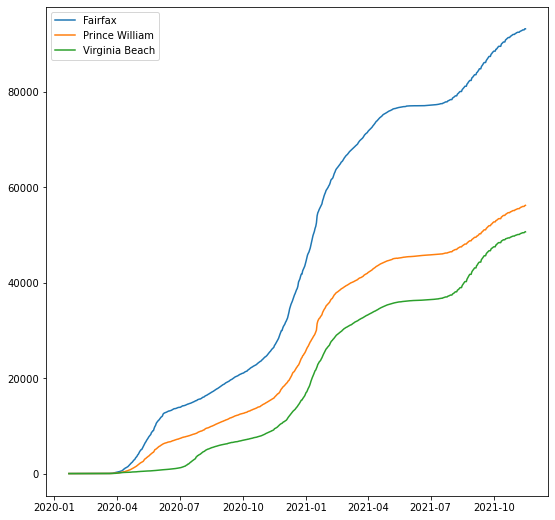

In [15]:
# 6 
fig, ax = plt.subplots(figsize= (9,9))
plt.plot(df_FF.Dates, df_FF.Cases, label = "Fairfax")
plt.plot(df_PW.Dates, df_PW.Cases, label = "Prince William")
plt.plot(df_VB.Dates, df_VB.Cases, label = "Virginia Beach")
plt.legend()

### Average and the total number of covid-19 cases in Fairfax is listed below.

In [16]:
# 7
df_FF_Oct = df_FF[(df_FF.Dates >= "2021-10-01") & (df_FF.Dates <= "2021-10-31")]
print("Average:", df_FF_Oct.New_Cases.mean(), "Total:" , df_FF_Oct.New_Cases.sum())
# Average and the total is printed below.

Average: 117.25806451612904 Total: 3635.0


### Part 2

In [209]:
path = "https://github.com/babdelfa/gis/blob/main/counties_geometry.zip?raw=true"
with fsspec.open(path) as file:
    county = gpd.read_file(file)

In [210]:
path = "https://github.com/babdelfa/gis/blob/main/state_geometry.zip?raw=true"
with fsspec.open(path) as file:
    state = gpd.read_file(file)

In [211]:
county.head()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry
0,1,1001.0,2.015303,0.150257,"POLYGON ((-86.41312 32.70739, -86.41304 32.687..."
1,2,1003.0,4.243962,0.409825,"POLYGON ((-87.76515 31.29735, -87.76360 31.297..."
2,3,1005.0,2.441082,0.223192,"POLYGON ((-85.35541 32.14717, -85.32444 32.147..."
3,4,1007.0,1.893893,0.156433,"POLYGON ((-87.06574 33.24691, -87.04483 33.246..."
4,5,1009.0,2.334544,0.164441,"POLYGON ((-86.48693 34.26021, -86.45288 34.259..."


In [212]:
df_VA_county = df_VA[df_VA.county.isin(["Fairfax", "Prince William", "Virginia Beach"])]


In [213]:
gdf_county = gpd.GeoDataFrame(df_VA_county,
                      crs = "EPSG:4269",
                      geometry = gpd.points_from_xy(df_VA_county.long_,df_VA_county.lat))

In [214]:
gdf = gpd.sjoin(county, gdf_county)
gdf.head()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry,index_right,FIPS,county,state,lat,long_,Dates,Cases,New_Cases
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",39897,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2020-02-02,0,0.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",2185461,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-11-05,50068,51.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",1470273,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-04-05,33538,56.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",36555,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2020-02-01,0,0.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",2188803,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-11-06,50068,0.0


In [215]:
state_VA = state[state["STATE_NAME"] == "Virginia"]

<AxesSubplot:>

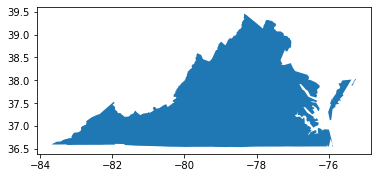

In [216]:
state_VA.plot()

In [217]:
state_VA.dtypes

STATE_NAME      object
DRAWSEQ          int64
STATE_FIPS      object
SUB_REGION      object
STATE_ABBR      object
geometry      geometry
dtype: object

In [218]:
gdf.rename(columns= {"state": "STATE_NAME"}, inplace=True)

In [219]:
virginia = state_VA.copy()

In [220]:
virginia.drop("geometry", axis=1, inplace=True)
gdf.dtypes

OBJECTID                int64
FIPS_BEA              float64
Shape_Leng            float64
Shape_Area            float64
geometry             geometry
index_right             int64
FIPS                  float64
county                 object
STATE_NAME             object
lat                   float64
long_                 float64
Dates          datetime64[ns]
Cases                   int64
New_Cases             float64
dtype: object

In [221]:
gdf.head()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry,index_right,FIPS,county,STATE_NAME,lat,long_,Dates,Cases,New_Cases
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",39897,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2020-02-02,0,0.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",2185461,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-11-05,50068,51.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",1470273,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-04-05,33538,56.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",36555,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2020-02-01,0,0.0
2865,2866,51810.0,1.454201,0.080104,"POLYGON ((-76.18240 36.92192, -76.17677 36.921...",2188803,51810.0,Virginia Beach,Virginia,36.732857,-76.045669,2021-11-06,50068,0.0


In [222]:
gdf.loc[gdf['county'] == 'Fairfax', 'Total_Cases'] = 1485
gdf.loc[gdf['county'] == 'Prince William', 'Total_Cases'] = 1356
gdf.loc[gdf['county'] == 'Virginia Beach', 'Total_Cases'] = 544

In [223]:
gdf = pd.merge(gdf, virginia, on="STATE_NAME")

In [224]:
gdf.tail()

,OBJECTID,FIPS_BEA,Shape_Leng,Shape_Area,geometry,index_right,FIPS,county,STATE_NAME,lat,long_,Dates,Cases,New_Cases,Total_Cases,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR
1990,2882,51942.0,1.694228,0.095682,"POLYGON ((-77.65180 38.94290, -77.64278 38.942...",2152017,51153.0,Prince William,Virginia,38.709162,-77.487137,2021-10-26,54842,37.0,1356.0,35,51,South Atlantic,VA
1991,2882,51942.0,1.694228,0.095682,"POLYGON ((-77.65180 38.94290, -77.64278 38.942...",1229625,51153.0,Prince William,Virginia,38.709162,-77.487137,2021-01-23,33048,174.0,1356.0,35,51,South Atlantic,VA
1992,2882,51942.0,1.694228,0.095682,"POLYGON ((-77.65180 38.94290, -77.64278 38.942...",76635,51153.0,Prince William,Virginia,38.709162,-77.487137,2020-02-13,0,0.0,1356.0,35,51,South Atlantic,VA
1993,2882,51942.0,1.694228,0.095682,"POLYGON ((-77.65180 38.94290, -77.64278 38.942...",2148675,51153.0,Prince William,Virginia,38.709162,-77.487137,2021-10-25,54805,170.0,1356.0,35,51,South Atlantic,VA
1994,2882,51942.0,1.694228,0.095682,"POLYGON ((-77.65180 38.94290, -77.64278 38.942...",768429,51153.0,Prince William,Virginia,38.709162,-77.487137,2020-09-07,11253,36.0,1356.0,35,51,South Atlantic,VA


<AxesSubplot:>

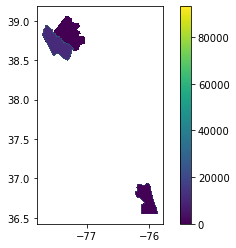

In [225]:
gdf.plot(column="Cases", legend=True)

## Choropleth map of the top 3 Counties in Virginia with the highest number of covid-19 cases.

C:\Users\MetroMoomin\anaconda3\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\MetroMoomin\anaconda3\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


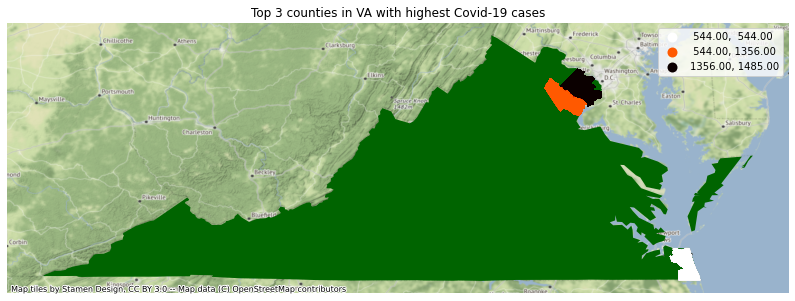

In [226]:
fig, ax = plt.subplots(figsize = (14,10))
state_VA.plot(ax = ax, color="darkgreen")
gdf.plot(column = "Total_Cases", scheme="quantiles", cmap="hot_r",legend=True, ax = ax, legend_kwds={"loc": "upper right"}, figsize=(14,10))
contextily.add_basemap(ax=ax, crs = 4269)
plt.axis("off")
plt.title("Top 3 counties in VA with highest Covid-19 cases")
plt.show()